In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import re


In [ ]:
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
orders = pd.read_csv("orders.csv")
order_items = pd.read_csv("order_items.csv")
events = pd.read_csv("events.csv")

# Describing the datasets


In [155]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  5000 non-null   int64 
 1   name         5000 non-null   object
 2   city         5000 non-null   object
 3   signup_date  5000 non-null   object
 4   pet_type     5000 non-null   object
 5   pet_age      5000 non-null   int64 
 6   is_premium   5000 non-null   bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 239.4+ KB


In [156]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        50000 non-null  int64  
 1   customer_id     50000 non-null  int64  
 2   order_date      50000 non-null  object 
 3   total_amount_x  50000 non-null  float64
 4   payment_mode    50000 non-null  object 
 5   total_amount_y  6567 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.3+ MB


In [157]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   event_id     60000 non-null  int64 
 1   customer_id  60000 non-null  int64 
 2   product_id   60000 non-null  int64 
 3   event_type   60000 non-null  object
 4   event_time   60000 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


In [158]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    150 non-null    int64  
 1   name          150 non-null    object 
 2   category      150 non-null    object 
 3   sub_category  150 non-null    object 
 4   price         150 non-null    float64
 5   brand         150 non-null    object 
 6   pet_type      150 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.3+ KB


In [159]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_item_id   7000 non-null   int64  
 1   order_id        7000 non-null   int64  
 2   product_id      7000 non-null   int64  
 3   quantity        7000 non-null   int64  
 4   price_per_unit  7000 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 273.6 KB


In [160]:
customers.describe()


,customer_id,pet_age
count,5000.000000,5000.000000
mean,2500.500000,5.496200
std,1443.520003,2.849212
min,1.000000,1.000000
25%,1250.750000,3.000000
50%,2500.500000,5.000000
75%,3750.250000,8.000000
max,5000.000000,10.000000


In [161]:
orders.describe()

,order_id,customer_id,total_amount_x,total_amount_y
count,50000.000000,50000.000000,50000.0,6567.000000
mean,25000.500000,2497.582620,0.0,1637.685063
std,14433.901067,1442.242172,0.0,1179.660733
min,1.000000,1.000000,0.0,111.140000
25%,12500.750000,1250.000000,0.0,725.360000
50%,25000.500000,2492.000000,0.0,1327.100000
75%,37500.250000,3747.250000,0.0,2268.760000
max,50000.000000,5000.000000,0.0,8932.400000


In [162]:
events.describe()

,event_id,customer_id,product_id
count,60000.000000,60000.000000,60000.000000
mean,30000.500000,2496.100400,75.305683
std,17320.652413,1447.308794,43.198822
min,1.000000,1.000000,1.000000
25%,15000.750000,1236.000000,38.000000
50%,30000.500000,2492.000000,75.000000
75%,45000.250000,3754.000000,112.000000
max,60000.000000,5000.000000,150.000000


In [163]:
order_items.describe()

,order_item_id,order_id,product_id,quantity,price_per_unit
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,24716.578286,75.941429,1.996000,767.298799
std,2020.870275,14378.057993,43.193643,0.817886,400.520592
min,1.000000,15.000000,1.000000,1.000000,111.140000
25%,1750.750000,12467.250000,39.000000,1.000000,411.840000
50%,3500.500000,24380.000000,76.000000,2.000000,734.940000
75%,5250.250000,37051.000000,113.000000,3.000000,1095.350000
max,7000.000000,49985.000000,150.000000,3.000000,1496.770000


In [164]:
products.describe()

,product_id,price
count,150.000000,150.000000
mean,75.500000,765.680333
std,43.445368,400.244957
min,1.000000,111.140000
25%,38.250000,411.867500
50%,75.500000,730.950000
75%,112.750000,1097.082500
max,150.000000,1496.770000


# Checking null Values or Duplicartes

In [165]:
datasets = [customers, orders, order_items , products, events]

for x in datasets:
    print(x.isnull().mean())

customer_id    0.0
name           0.0
city           0.0
signup_date    0.0
pet_type       0.0
pet_age        0.0
is_premium     0.0
dtype: float64
order_id          0.00000
customer_id       0.00000
order_date        0.00000
total_amount_x    0.00000
payment_mode      0.00000
total_amount_y    0.86866
dtype: float64
order_item_id     0.0
order_id          0.0
product_id        0.0
quantity          0.0
price_per_unit    0.0
dtype: float64
product_id      0.0
name            0.0
category        0.0
sub_category    0.0
price           0.0
brand           0.0
pet_type        0.0
dtype: float64
event_id       0.0
customer_id    0.0
product_id     0.0
event_type     0.0
event_time     0.0
dtype: float64


In [166]:
for x in datasets:
    print(x.duplicated().value_counts())

False    5000
Name: count, dtype: int64
False    50000
Name: count, dtype: int64
False    7000
Name: count, dtype: int64
False    150
Name: count, dtype: int64
False    60000
Name: count, dtype: int64


In [167]:

customers['signup_date'] = pd.to_datetime(customers['signup_date'])
orders['order_date'] = pd.to_datetime(orders['order_date'])
events['event_time'] = pd.to_datetime(events['event_time'])

# Q1: Customer Summary

In [168]:
orders_summary = orders.groupby('customer_id').agg({
    'order_id': 'count',
    'total_amount_y': 'sum'
}).rename(columns={'order_id': 'total_orders', 'total_amount_y': 'total_spend'})

customer_summary = customers.set_index('customer_id')[['is_premium', 'pet_type']]
customer_summary = customer_summary.join(orders_summary).fillna({'total_orders': 0, 'total_spend': 0})

customer_summary.reset_index().to_csv("customer_summary.csv", index=False)


In [169]:
customer_summary.head()

,is_premium,pet_type,total_orders,total_spend
customer_id,,,,
1,True,Dog,12,6406.89
2,True,Dog,5,0.00
3,True,Dog,9,1132.08
4,True,Dog,10,1899.98
5,False,Dog,8,0.00


In [170]:
customer_spend = orders.groupby('customer_id')['total_amount_y'].sum().reset_index()
customer_spend = customer_spend.merge(customers[['customer_id', 'pet_type']], on='customer_id')


spend_on_pet = customer_spend.groupby('pet_type')['total_amount_y'].sum().astype(int).reset_index()
spend_on_pet.columns = ['Pet Type', 'Total Spends']
spend_on_pet = spend_on_pet.sort_values(by='Total Spends', ascending=False)

spend_on_pet

,Pet Type,Total Spends
2,Dog,4966159
1,Cat,4751443
0,Both,1037074


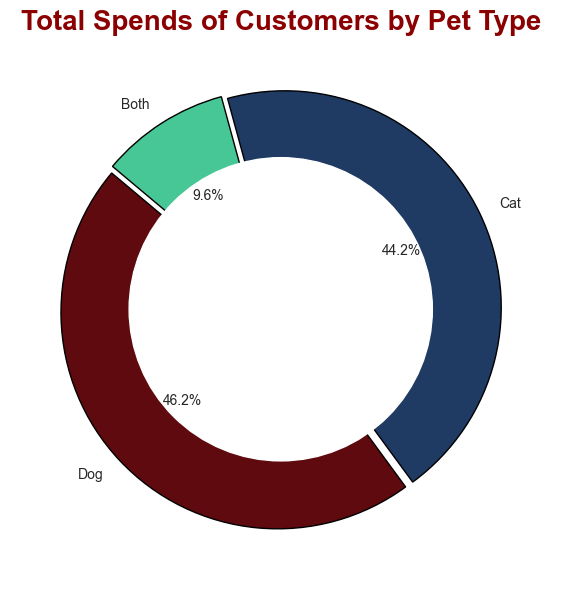

In [246]:
colors = ["#5F0A0E", "#1F3A63", "#41C592F6"]
explode = [0.02] * len(spend_on_pet)

plt.figure(figsize=(6, 6))
plt.pie(spend_on_pet['Total Spends'], labels=spend_on_pet['Pet Type'],
        autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops={'edgecolor': 'black'}, explode=explode)

# Donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Total Spends of Customers by Pet Type', fontsize=20, weight='bold', color='darkred')
plt.tight_layout()
plt.show()

In [172]:
pet_counts = customers['pet_type'].value_counts().reset_index()
pet_counts.columns = ['Pet Type', 'Customer Count']
pet_counts

,Pet Type,Customer Count
0,Cat,2287
1,Dog,2216
2,Both,497


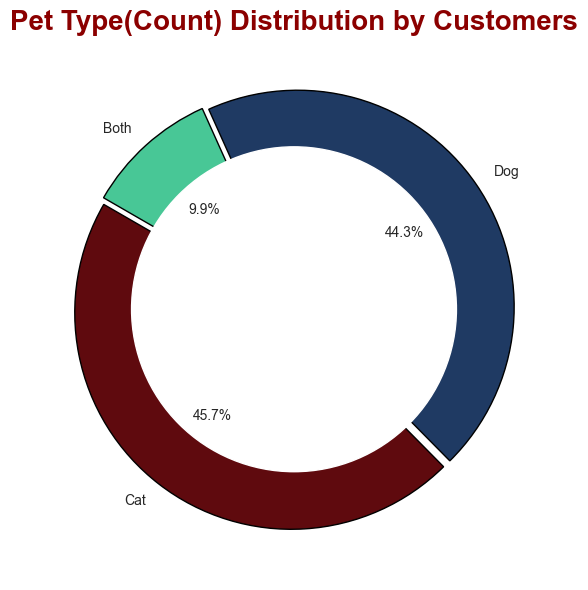

In [247]:
colors = ["#5F0A0E", "#1F3A63", "#41C592F6"]
explode = [0.02] * len(pet_counts)

plt.figure(figsize=(6, 6))
plt.pie(pet_counts['Customer Count'], labels=pet_counts['Pet Type'],
        autopct='%1.1f%%', startangle=150, colors=colors,
        wedgeprops={'edgecolor': 'black'}, explode=explode)


centre_circle = plt.Circle((0, 0), 0.75, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Pet Type(Count) Distribution by Customers', fontsize=20, weight='bold', color='darkred')
plt.tight_layout()
plt.show()

#  Q2: Product Performance 

In [174]:
MItems = order_items.merge(orders[['order_id', 'customer_id']], on='order_id')
product_stats = MItems.groupby('product_id').agg({
    'quantity': 'sum',
    'price_per_unit': 'mean',
    'customer_id': pd.Series.nunique
}).rename(columns={'customer_id': 'unique_customers'})

product_stats['revenue'] = product_stats['quantity'] * product_stats['price_per_unit']
product_stats = product_stats.merge(products[['product_id', 'name', 'pet_type']], on='product_id')


## top 5 by each metrics i.e quantity, revenue, customer count

In [175]:
MItems = order_items.merge(orders[['order_id', 'customer_id']], on='order_id')
product_info = products[['product_id', 'name', 'pet_type']]


def clean_name(name):
    return re.sub(r"\s\d+[a-zA-Z]+$", "", name).strip()

product_info['product_name'] = product_info['name'].apply(clean_name) + " (" + product_info['pet_type'] + ")"


MItems = MItems.merge(product_info[['product_id', 'product_name', 'pet_type']], on='product_id')


product_stats = MItems.groupby(['product_id', 'product_name', 'pet_type']).agg({
    'quantity': 'sum',
    'price_per_unit': 'mean',
    'customer_id': pd.Series.nunique
}).rename(columns={'customer_id': 'unique_customers'})

product_stats['revenue'] = product_stats['quantity'] * product_stats['price_per_unit']



top_by_quantity = product_stats.sort_values(by='quantity', ascending=False).head(5)
top_by_revenue = product_stats.sort_values(by='revenue', ascending=False).head(5)
top_by_customers = product_stats.sort_values(by='unique_customers', ascending=False).head(5)


top_combined = pd.concat([top_by_quantity, top_by_revenue, top_by_customers]).drop_duplicates()


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_23824\1620237735.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_info['product_name'] = product_info['name'].apply(clean_name) + " (" + product_info['pet_type'] + ")"


In [250]:
def plot_metric(df, metric, title, color='steelblue'):
    plt.figure(figsize=(9, 6))
    
    
    sorted_df = df.sort_values(by=metric, ascending=True)
    
    
    bars = sns.barplot(
        x=metric,
        y='product_name',
        data=sorted_df,
        color=color,
        edgecolor='black',       
        linewidth=1.2 ,
        zorder = 0          
    )
    
  
    for container in bars.containers:
        bars.bar_label(container, fmt='%.0f', label_type='center', padding=3, weight='bold')

    
    plt.title(title, fontsize=20, weight='bold', color = 'darkred')
    plt.xlabel('', fontsize=12)
    plt.ylabel('', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.3, color ="#772634")
    plt.tight_layout()
    plt.show()

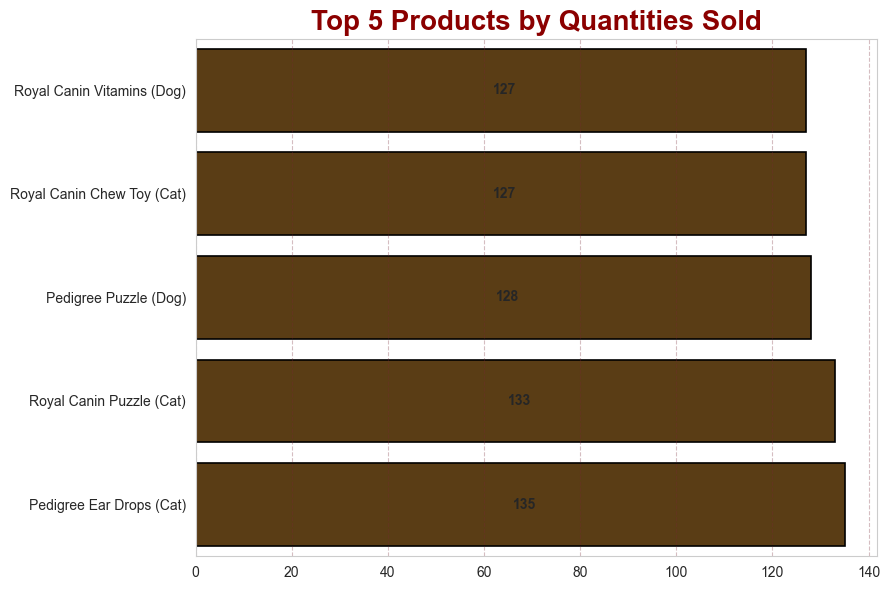

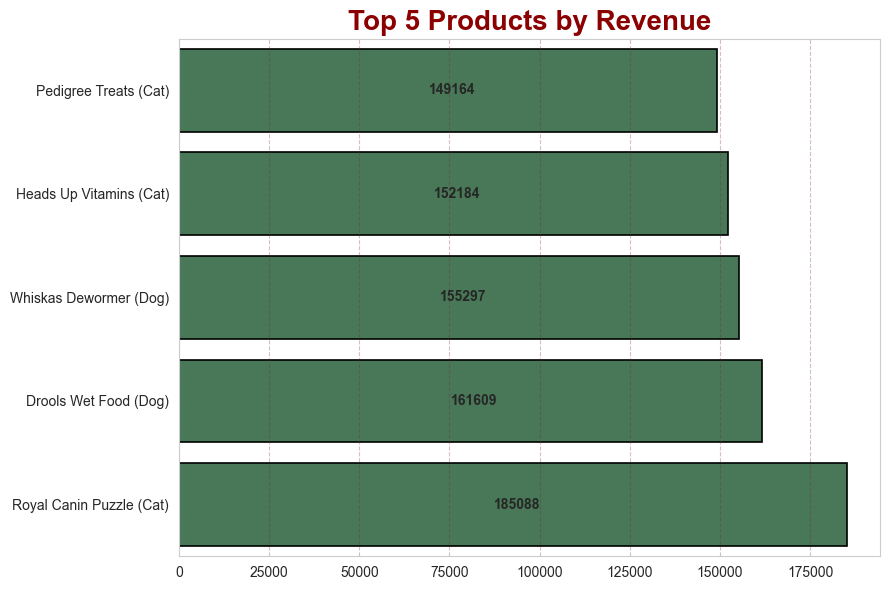

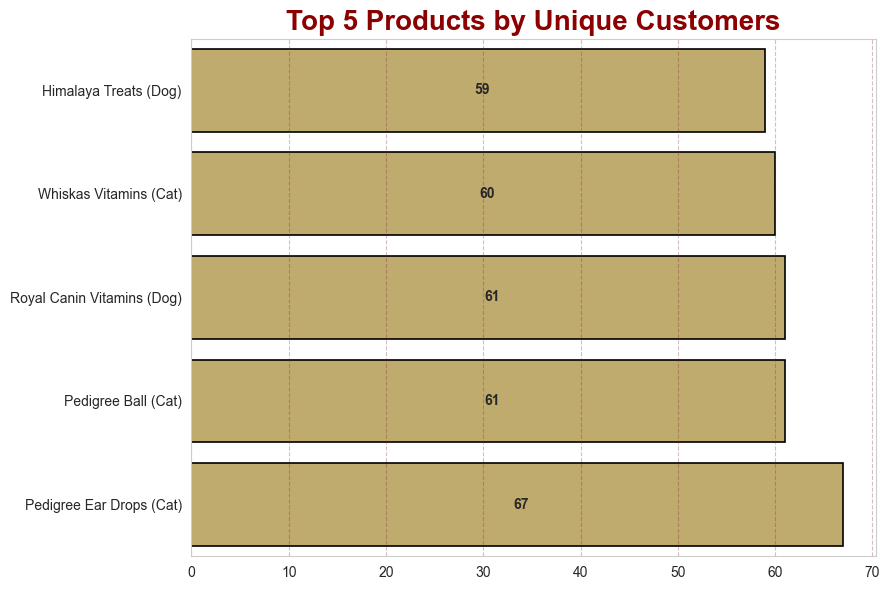

In [251]:
plot_metric(top_by_quantity, 'quantity', 'Top 5 Products by Quantities Sold', color="#663F09")
plot_metric(top_by_revenue, 'revenue', 'Top 5 Products by Revenue', color="#408055")
plot_metric(top_by_customers, 'unique_customers', 'Top 5 Products by Unique Customers', color="#CEB161")

In [178]:
top_by_quantity

,,,quantity,price_per_unit,unique_customers,revenue
product_id,product_name,pet_type,,,,
140,Pedigree Ear Drops (Cat),Cat,135,1075.64,67,145211.40
90,Royal Canin Puzzle (Cat),Cat,133,1391.64,59,185088.12
15,Pedigree Puzzle (Dog),Dog,128,578.37,58,74031.36
79,Royal Canin Vitamins (Dog),Dog,127,1095.35,61,139109.45
63,Royal Canin Chew Toy (Cat),Cat,127,474.74,57,60291.98


In [179]:
top_by_revenue

,,,quantity,price_per_unit,unique_customers,revenue
product_id,product_name,pet_type,,,,
90,Royal Canin Puzzle (Cat),Cat,133,1391.64,59,185088.12
82,Drools Wet Food (Dog),Dog,120,1346.74,58,161608.80
47,Whiskas Dewormer (Dog),Dog,121,1283.45,57,155297.45
73,Heads Up Vitamins (Cat),Cat,105,1449.37,50,152183.85
141,Pedigree Treats (Cat),Cat,115,1297.08,49,149164.20


In [180]:
top_by_customers


,,,quantity,price_per_unit,unique_customers,revenue
product_id,product_name,pet_type,,,,
140,Pedigree Ear Drops (Cat),Cat,135,1075.64,67,145211.40
14,Pedigree Ball (Cat),Cat,115,1076.84,61,123836.60
79,Royal Canin Vitamins (Dog),Dog,127,1095.35,61,139109.45
100,Whiskas Vitamins (Cat),Cat,120,826.00,60,99120.00
58,Himalaya Treats (Dog),Dog,122,307.90,59,37563.80


In [181]:
top_combined = pd.concat([
    top_by_quantity,
    top_by_revenue,
    top_by_customers
]).drop_duplicates().reset_index(drop=True)

top_combined.to_csv("top_products.csv", index=False)

#  Q3: City Level Revenue 

In [182]:
customer_orders = customers.merge(orders, on='customer_id')
city_group = customer_orders.groupby('city').agg(
    customer_count=('customer_id', pd.Series.nunique),
    total_orders=('order_id', 'count'),
    total_revenue=('total_amount_y', 'sum')
)

premium_pct = customers.groupby('city')['is_premium'].mean() * 100
premium_pct = premium_pct.map("{:.2f}".format)
city_group['pct_premium_customers'] = premium_pct


city_group = city_group.sort_values(by='total_revenue', ascending=False)
city_group.to_csv("city_metrics.csv")

In [183]:
customers.groupby('city')['is_premium'].mean() * 100

city
Ahmedabad    51.061174
Bangalore    54.050786
Chennai      51.963048
Delhi        49.752475
Hyderabad    49.184149
Mumbai       51.666667
Name: is_premium, dtype: float64

In [184]:
city_group

,customer_count,total_orders,total_revenue,pct_premium_customers
city,,,,
Chennai,866,8624,2039005.95,51.96
Mumbai,840,8282,1841469.10,51.67
Hyderabad,858,8648,1791069.86,49.18
Bangalore,827,8402,1721405.43,54.05
Ahmedabad,801,7968,1689619.74,51.06
Delhi,808,8076,1672107.73,49.75


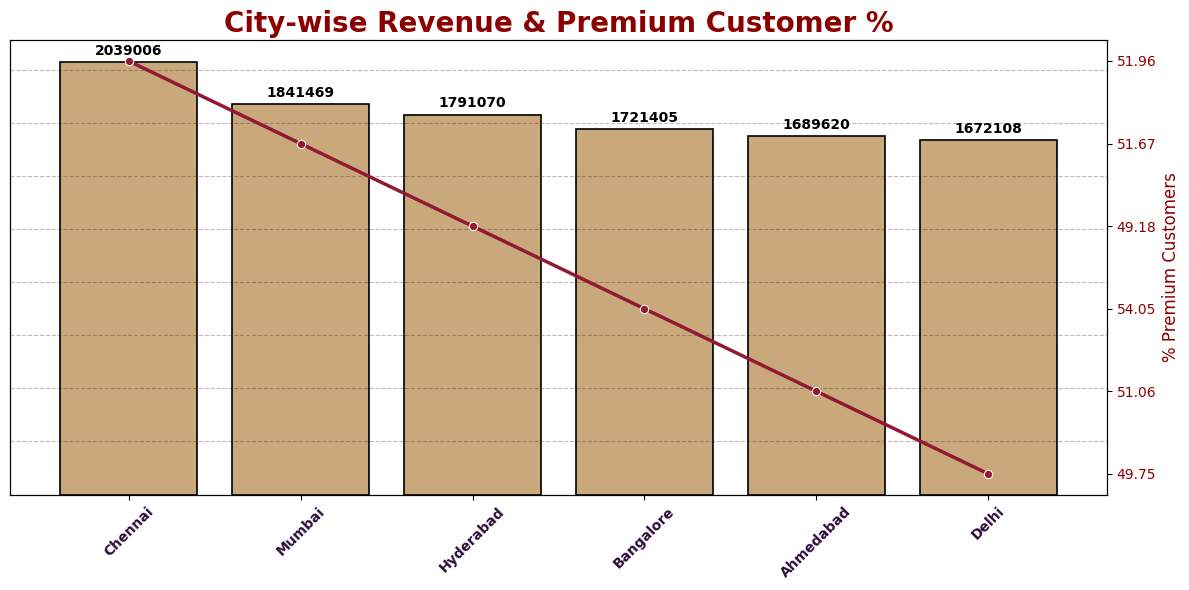

In [185]:
city_group_sorted = city_group.sort_values('total_revenue', ascending=False).copy()
city_group_sorted.reset_index(inplace=True)  


fig, ax1 = plt.subplots(figsize=(12, 6))


bars = sns.barplot(
    x='city',
    y='total_revenue',
    data=city_group_sorted,
    ax=ax1,
    color="#D6AB6F",
    edgecolor='black',
    linewidth=1.2
)


for container in bars.containers:
    bars.bar_label(container, fmt='%.0f', label_type='edge', padding=3, weight='bold')


ax1.set_ylabel('',)
ax1.set_yticklabels([])
ax1.set_xlabel('', fontsize=14 )
ax1.set_title('City-wise Revenue & Premium Customer %', fontsize=20, weight='bold', color = 'darkred')
ax1.tick_params(axis='y', length = 0)
plt.xticks(rotation=45, color ="#2D0D3B", weight = 'bold')


ax2 = ax1.twinx()
sns.lineplot(
    x='city',
    y='pct_premium_customers',
    data=city_group_sorted,
    ax=ax2,
    color="#921933",
    marker='o',
    linewidth=2.5
)
ax2.set_ylabel('% Premium Customers', color='darkred', fontsize=12)
ax2.tick_params(axis='y', labelcolor='darkred')


ax1.grid(axis='y', linestyle='--', alpha=0.3, color = "#42141E")
plt.tight_layout()
plt.show()

In [186]:
premium_pct

city
Ahmedabad    51.06
Bangalore    54.05
Chennai      51.96
Delhi        49.75
Hyderabad    49.18
Mumbai       51.67
Name: is_premium, dtype: object

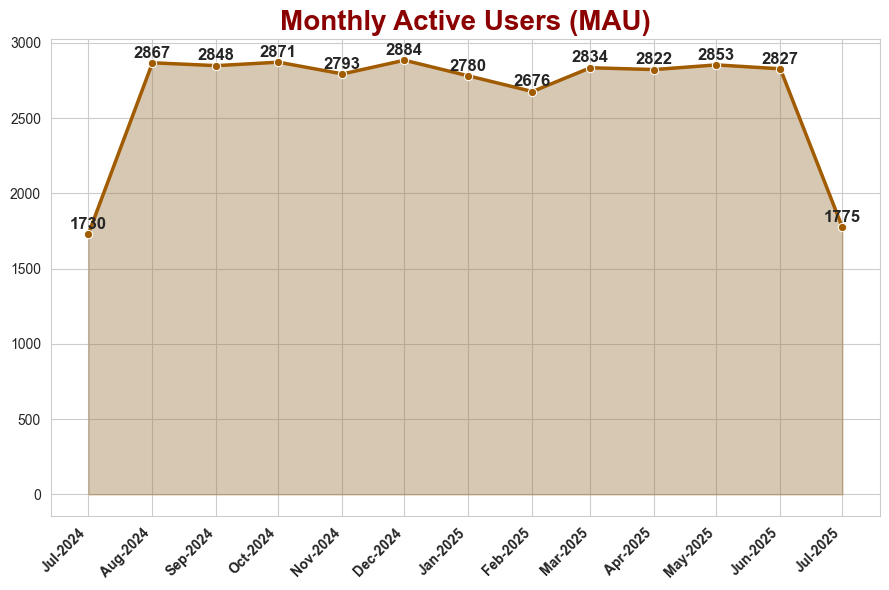

In [207]:
orders['order_date'] = pd.to_datetime(orders['order_date'])


orders['order_month'] = orders['order_date'].dt.strftime('%b-%Y')  


mau = orders.groupby('order_month')['customer_id'].nunique().reset_index()
mau.columns = ['Month', 'MAU']


mau['Month_dt'] = pd.to_datetime(mau['Month'], format='%b-%Y')
mau.sort_values('Month_dt', inplace=True)


plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")

plt.fill_between(mau['Month_dt'], mau['MAU'], color="#9C7742", alpha=0.4)
sns.lineplot(data=mau, x='Month_dt', y='MAU', marker='o', linewidth=2.5, color='#A15B00')


for x, y in zip(mau['Month_dt'], mau['MAU']):
    plt.text(x, y + 35, str(y), ha='center', fontsize=12, fontweight='bold')


plt.title('Monthly Active Users (MAU)', fontsize=20, weight='bold', color='darkred')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)

plt.xticks(mau['Month_dt'], mau['Month'], rotation=45, ha='right', weight = 'bold')
plt.tight_layout()
plt.show()

#  Q4: Funnel Conversion Metrics 

In [187]:

event_counts = events.pivot_table(
    index='customer_id',
    columns='event_type',
    aggfunc='size',
    fill_value=0
).reset_index()
event_counts.columns.name = None


event_counts['view_to_cart_rate'] = event_counts.apply(
    lambda row: row['add_to_cart'] / row['view'] if row['view'] > 0 else 0, axis=1)
event_counts['view_to_cart_rate'] = event_counts['view_to_cart_rate'].map('{:.2f}'.format)



event_counts['cart_to_purchase_rate'] = event_counts.apply(
    lambda row: row['purchase'] / row['add_to_cart'] if row['add_to_cart'] > 0 else 0, axis=1)
event_counts['cart_to_purchase_rate'] = event_counts['cart_to_purchase_rate'].map('{:.2f}'.format)




event_counts.to_csv("customer_funnel_metrics.csv", index=False)

In [188]:
event_counts

,customer_id,add_to_cart,purchase,view,view_to_cart_rate,cart_to_purchase_rate
0,1,1,3,4,0.25,3.00
1,2,6,1,6,1.00,0.17
2,3,4,1,6,0.67,0.25
3,4,4,2,7,0.57,0.50
4,5,2,1,4,0.50,0.50
...,...,...,...,...,...,...
4995,4996,2,0,6,0.33,0.00
4996,4997,7,0,5,1.40,0.00
4997,4998,2,1,4,0.50,0.50
4998,4999,2,0,6,0.33,0.00


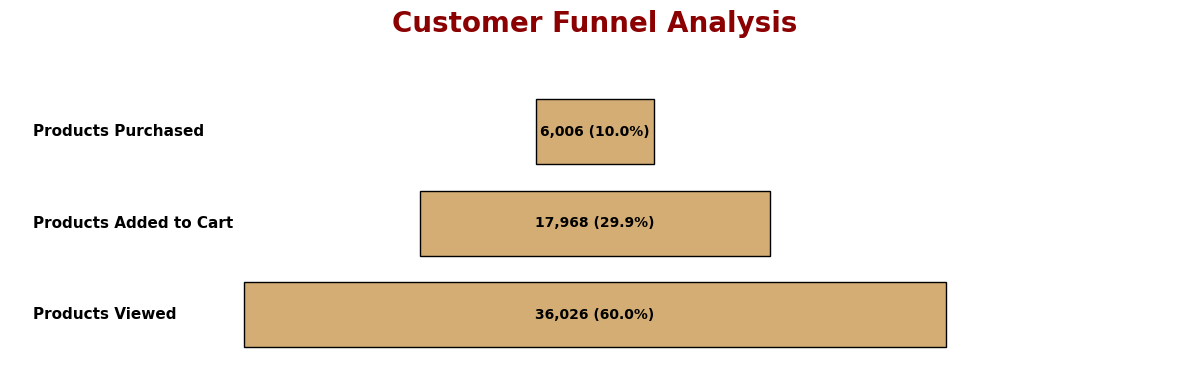

In [ ]:
total_views = event_counts['view'].sum()                                  # Customers who viewed only
total_carts = event_counts['add_to_cart'].sum()                           # Customers who added Products to the cart
total_purchases = event_counts['purchase'].sum()                          # Customers who purchased the products 


labels = ['Products Viewed', 'Products Added to Cart', 'Products Purchased']
values = [total_views, total_carts, total_purchases]


percentages = [v / (total_views + total_carts + total_purchases) * 100 for v in values]


max_val = max(values)
widths = [v / (total_views + total_carts + total_purchases) for v in values]

fig, ax = plt.subplots(figsize=(12, 4))  

bar_height = 0.2
spacing = 0.08 

for i in range(len(labels)):
    ax.barh(
        y=i * (bar_height + spacing),
        width=widths[i],
        height=bar_height,
        left=(1 - widths[i]) / 2,
        color='#D4AD75',
        edgecolor='black'
    )
    ax.text(
        0.02, i * (bar_height + spacing),
        labels[i],
        va='center',
        ha='left',
        fontsize=11,
        weight='bold'
    )
    ax.text(
        0.5, i * (bar_height + spacing),
        f"{values[i]:,} ({percentages[i]:.1f}%)",
        ha='center',
        va='center',
        fontsize=10,
        weight='bold'
    )


ax.set_xlim(0, 1)
ax.set_ylim(-bar_height, len(labels) * (bar_height + spacing))
ax.set_xticks([])
ax.set_yticks([])
for side in ['top', 'right', 'left', 'bottom']:
    ax.spines[side].set_visible(False)

ax.set_title('Customer Funnel Analysis', fontsize=20, weight='bold', color = 'darkred')
plt.tight_layout()
plt.show()

In [190]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   event_id     60000 non-null  int64         
 1   customer_id  60000 non-null  int64         
 2   product_id   60000 non-null  int64         
 3   event_type   60000 non-null  object        
 4   event_time   60000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.3+ MB


# Q5: High Intent Customers

In [191]:
last_date = events['event_time'].max()
cutoff_date = last_date - timedelta(days=30)

recent_purchases = events[(events['event_type'] == 'purchase') & (events['event_time'] >= cutoff_date)]
recent_purchase_ids = set(recent_purchases['customer_id'])

def is_high_intent(row):
    return (
        row.get('view', 0) > 5 and
        row.get('add_to_cart', 0) > 2 and
        row['customer_id'] in recent_purchase_ids
    )

event_counts['is_high_intent'] = event_counts.apply(is_high_intent, axis=1)
high_intent_df = event_counts[['customer_id', 'is_high_intent']]



In [193]:
print(high_intent_df[high_intent_df['is_high_intent'] == True])

      customer_id  is_high_intent
2               3            True
3               4            True
6               7            True
22             23            True
25             26            True
...           ...             ...
4894         4895            True
4942         4943            True
4958         4959            True
4968         4969            True
4969         4970            True

[457 rows x 2 columns]


In [194]:
event_counts.head()

,customer_id,add_to_cart,purchase,view,view_to_cart_rate,cart_to_purchase_rate,is_high_intent
0,1,1,3,4,0.25,3.00,False
1,2,6,1,6,1.00,0.17,False
2,3,4,1,6,0.67,0.25,True
3,4,4,2,7,0.57,0.50,True
4,5,2,1,4,0.50,0.50,False


In [195]:
intent_counts = event_counts['is_high_intent'].value_counts().rename({True: 'High Intent', False: 'Other'})

In [196]:
intent_counts

is_high_intent
Other          4543
High Intent     457
Name: count, dtype: int64

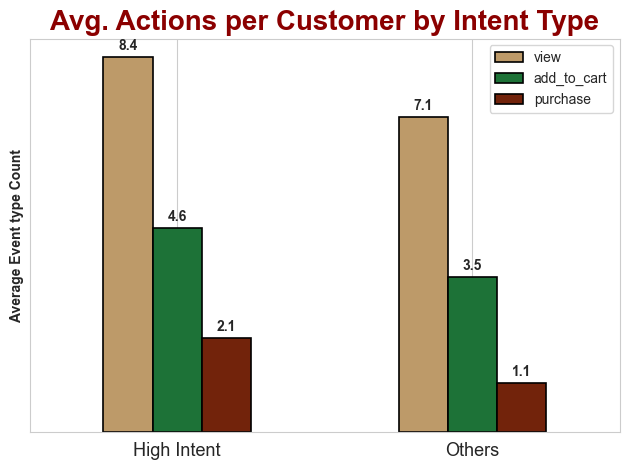

In [208]:
high = event_counts[event_counts['is_high_intent'] == True].copy()
non_high = event_counts[event_counts['is_high_intent'] == False].copy()


actions = ['view', 'add_to_cart', 'purchase']
avg_high = high[actions].mean()
avg_non_high = non_high[actions].mean()

df = pd.DataFrame({'High Intent': avg_high, 'Others': avg_non_high}).T

df.plot(kind='bar', stacked=False, edgecolor='black', linewidth=1.2 , color=["#BD9A69", "#1D7237", "#72230B"])
plt.title("Avg. Actions per Customer by Intent Type", weight = 'bold', fontsize = '20', color = 'darkred')
plt.yticks([])
plt.ylabel("Average Event type Count", weight = 'bold')
plt.xticks(rotation=0,  fontsize ='13' )
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f', weight = 'bold', label_type='edge', padding=3)
plt.tight_layout()
plt.show()

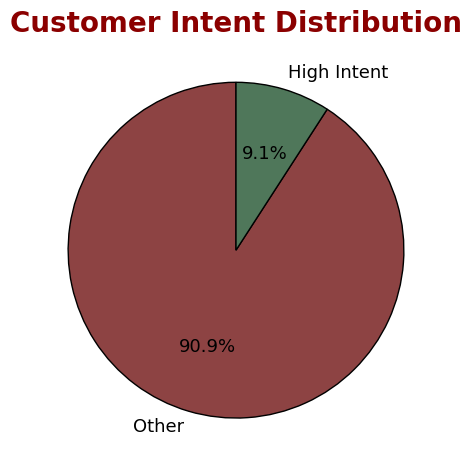

In [199]:
intent_counts.plot(kind='pie', autopct='%.1f%%', labels=['Other', 'High Intent'],
                   colors=["#8d4343", '#4f775a'], startangle=90, wedgeprops={'edgecolor': 'black'}, fontsize = '13')
plt.title('Customer Intent Distribution', weight = 'bold', fontsize = '20', color = 'darkred')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Top Brands by their Revenue

In [201]:
items_with_customers = order_items.merge(orders[['order_id', 'customer_id']], on='order_id')

brands_table = items_with_customers.merge(products[['product_id', 'brand']], on='product_id')


brands_table['revenue'] = brands_table['quantity'] * brands_table['price_per_unit']


top_brands = brands_table.groupby('brand')['revenue'].sum().reset_index()
top_brands = top_brands.sort_values(by='revenue', ascending=False).head(10)
top_brands

,brand,revenue
2,Himalaya,2257793.04
1,Heads Up,1836493.33
4,Royal Canin,1820739.85
0,Drools,1787262.93
3,Pedigree,1550599.12
5,Whiskas,1501789.54


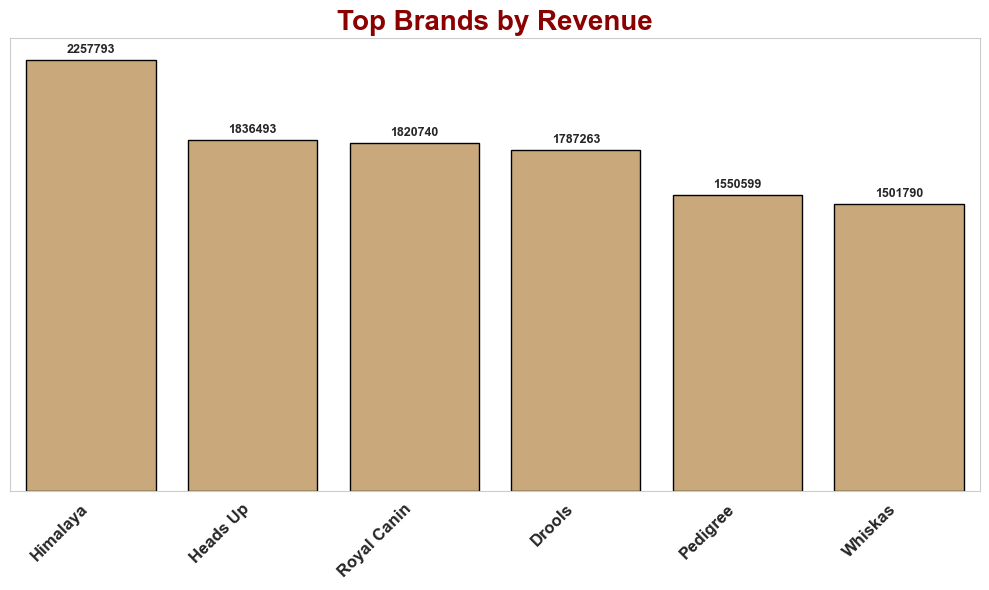

In [209]:
plt.figure(figsize=(10, 6))
bars = sns.barplot(data=top_brands, x='brand', y='revenue', color='#D6AB6F', edgecolor='black')


for bar in bars.containers:
    bars.bar_label(bar, fmt='%.0f', label_type='edge', padding=3, fontsize=9, weight='bold')

plt.title('Top Brands by Revenue', fontsize=20, weight='bold', color='darkred')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.xticks(rotation=45, ha='right', weight = 'bold', fontsize = 12)
plt.tight_layout()
plt.show()

In [205]:
brands_table

,order_item_id,order_id,product_id,quantity,price_per_unit,customer_id,brand,revenue
0,1,33554,119,1,1422.05,867,Royal Canin,1422.05
1,2,27291,147,3,1290.00,3781,Drools,3870.00
2,3,46287,102,2,522.48,351,Himalaya,1044.96
3,4,30376,13,1,277.06,2602,Drools,277.06
4,5,3388,3,2,237.32,379,Himalaya,474.64
...,...,...,...,...,...,...,...,...
6995,6996,5722,138,1,362.68,2843,Himalaya,362.68
6996,6997,38840,118,1,1207.93,3312,Whiskas,1207.93
6997,6998,20794,119,3,1422.05,3146,Royal Canin,4266.15
6998,6999,21734,132,3,1121.51,178,Pedigree,3364.53
